___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import plotly
from sklearn.model_selection import train_test_split
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Bunu lokal olarak interaktif cizime izin vermek icin yazdik
pd.set_option('display.width', 1000)

#### Load Dataset

In [4]:
df2=pd.read_csv(r"Mall_Customers.csv")

In [5]:
df=df2.copy()

#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000,200.000,200.000,200.000
mean,100.500,38.850,60.560,50.200
std,57.879,13.969,26.265,25.824
min,1.000,18.000,15.000,1.000
25%,50.750,28.750,41.500,34.750
50%,100.500,36.000,61.500,50.000
75%,150.250,49.000,78.000,73.000
max,200.000,70.000,137.000,99.000


In [10]:
df.isnull().sum().sum()

0

In [12]:
col = df.columns

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [14]:
col[0]

'CustomerID'

In [18]:
for c in col:
    print("column name:{}".format(c))
    print(df[c].unique())

column name:CustomerID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
column name:Gender
['Male' 'Female']
column name:Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 6

In [ ]:
# pek null veya cok gereksiz veri gözükmüyor. 

In [6]:
df.duplicated().sum()

0

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [5]:
df.drop(["CustomerID"], axis=1, inplace = True)

In [6]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

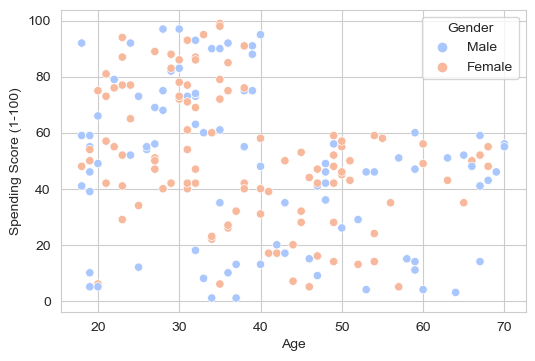

In [7]:
sns.scatterplot(data=df, x= "Age", y="Spending Score (1-100)", hue ="Gender", palette="coolwarm" )

In [ ]:
# Görünüse göre gencler daha cok harciyor, gender pek fark etmiyor..Zorlarsak yaslilarda erkekler bir tik önde..

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

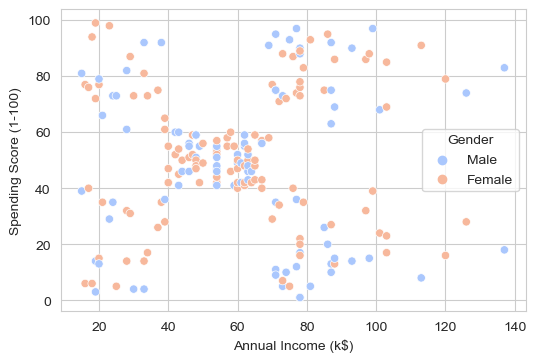

In [12]:
sns.scatterplot(data=df, x= "Annual Income (k$)", y="Spending Score (1-100)", hue ="Gender", palette="coolwarm" )

In [ ]:
# Enteresan bir dagilim sekli.. Orta gelirliler pek harcamiyor..

In [10]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000,-0.012,-0.327
Annual Income (k$),-0.012,1.000,0.010
Spending Score (1-100),-0.327,0.010,1.000


In [17]:
df3 = df.drop("Gender", axis=1)

<AxesSubplot:>

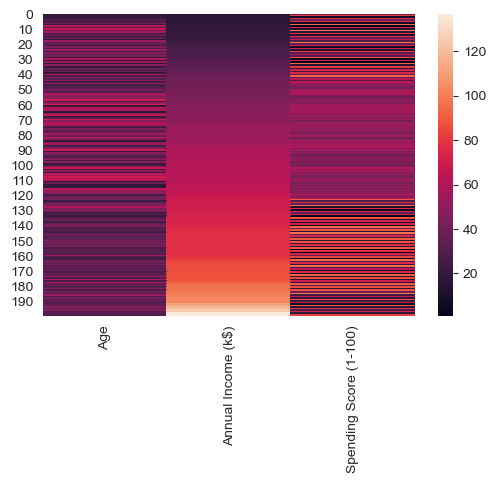

In [16]:
sns.heatmap(data=df3)

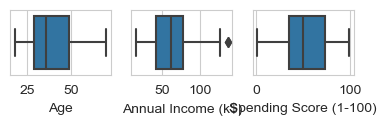

In [22]:
#outlier detection
a=0

for i in df.columns[1:10]:
    a = a+1
    plt.subplot(4,4,a)
    sns.boxplot(x=i, data=df, whis=1.5)

<AxesSubplot:>

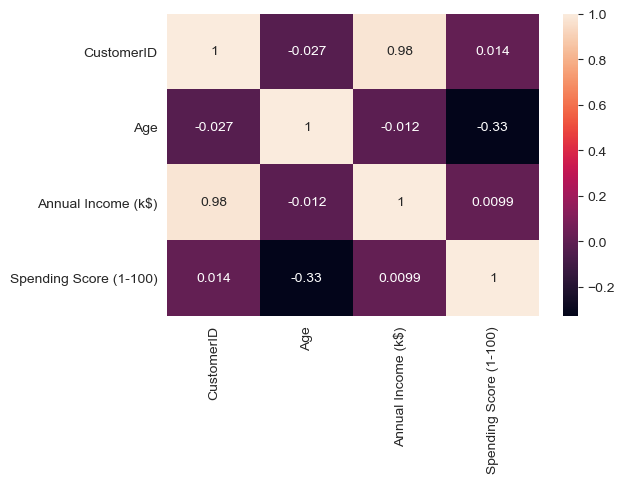

In [7]:
sns.heatmap(df.corr(),annot= True)

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

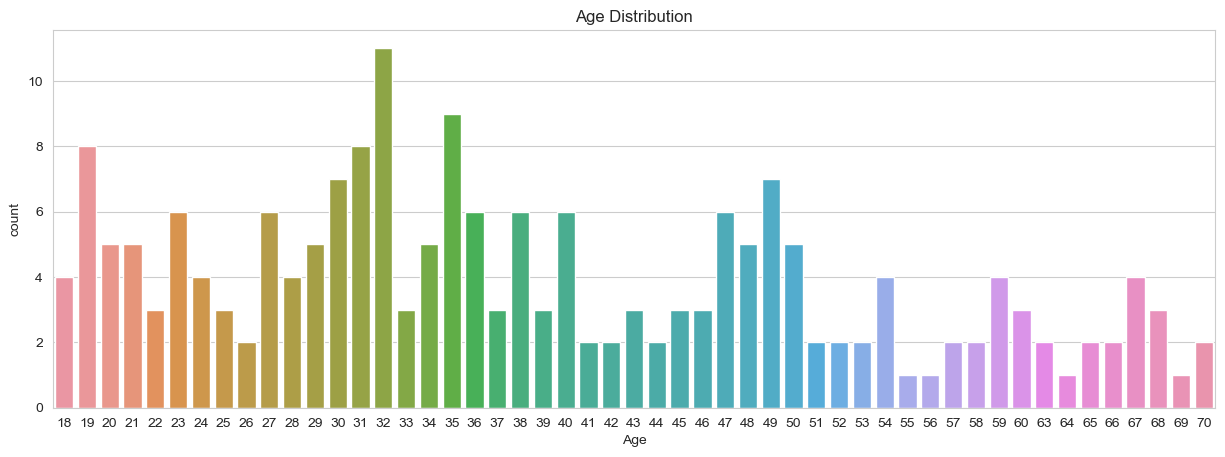

In [8]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x ='Age', data = df)
plt.title('Age Distribution')
plt.xlabel('Age')
ax.bar_label(ax.containers[0]);

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

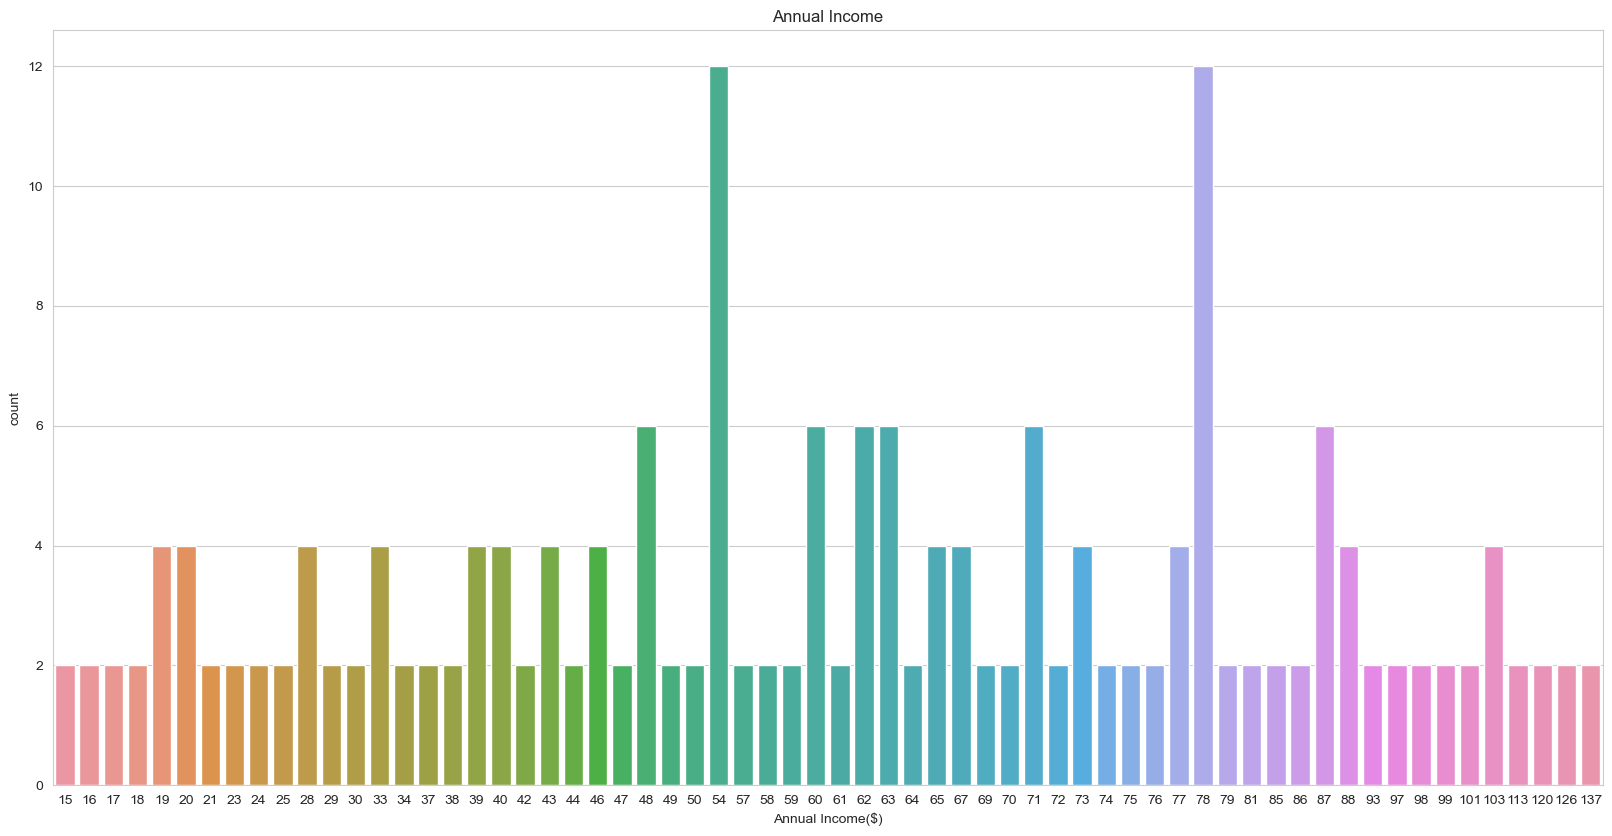

In [9]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Annual Income (k$)', data=df)
plt.title('Annual Income')
plt.xlabel('Annual Income($)')
ax.bar_label(ax.containers[0]);

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

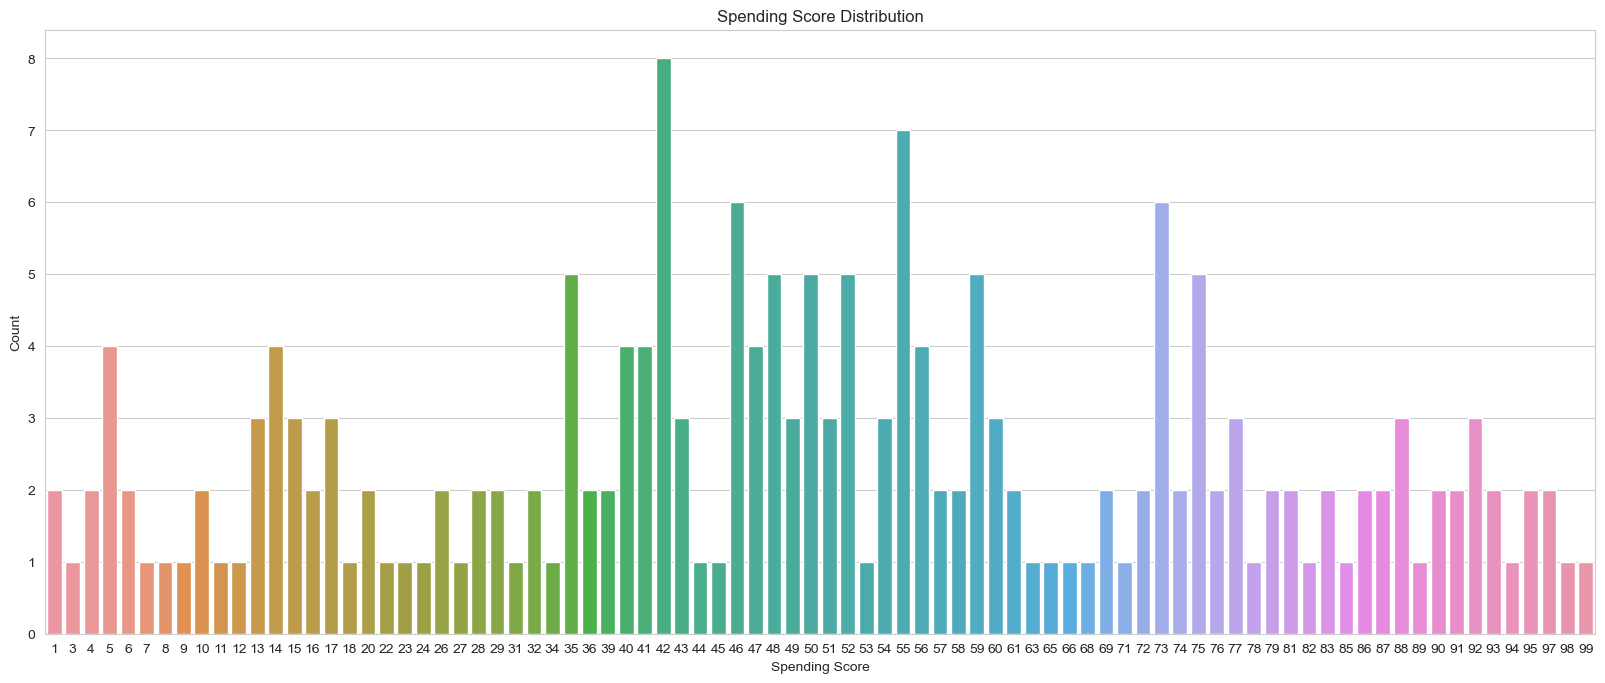

In [10]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
ax.bar_label(ax.containers[0]);

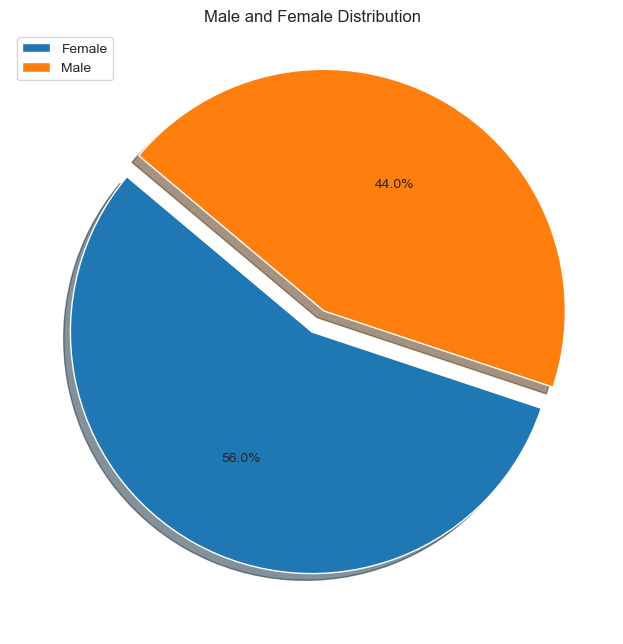

In [11]:
plt.figure(figsize=(8,8))

explode = [0, 0.1]
plt.pie(df['Gender'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off');

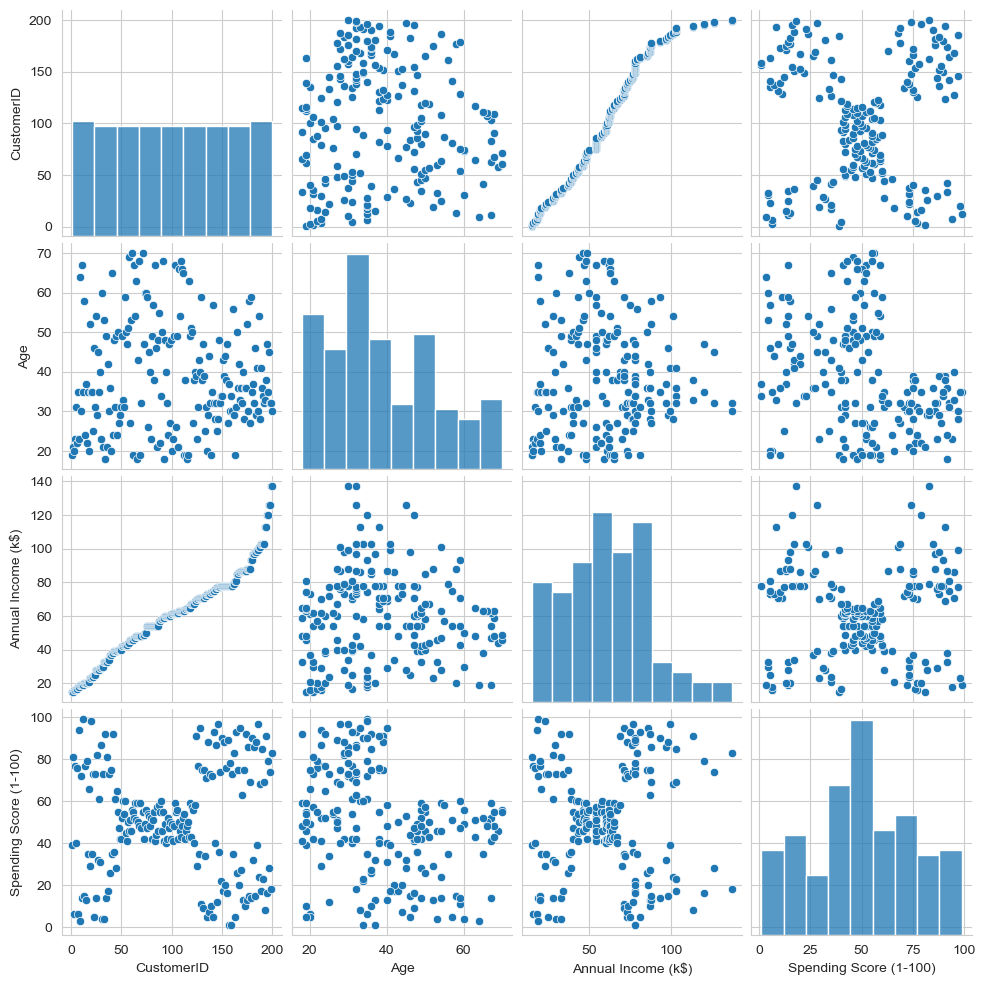

In [12]:
sns.pairplot(df)
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [22]:
from sklearn.cluster import KMeans

In [18]:
new= ["Age", "Spending Score (1-100)"]
X2= df3[new]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [20]:
z=StandardScaler()
X2[new]=z.fit_transform(X2[new])

In [23]:
ssd = []  # sum squared distance
K = range(2,10)
for k in K:
    model=KMeans(n_clusters= k, random_state=60)
    model.fit(X2)
    ssd.append(model.inertia_)
    

Text(0.5, 1.0, 'elbow method')

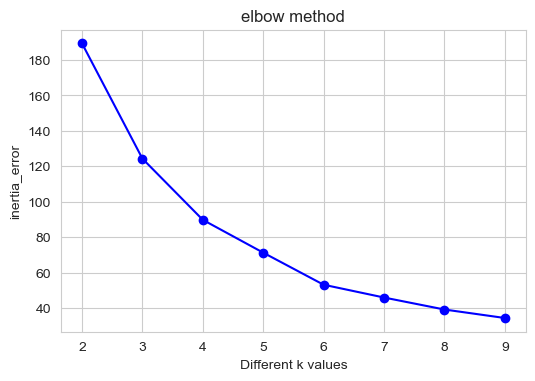

In [33]:
plt.plot(K,ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia_error")
plt.title("elbow method")

In [ ]:
k=6 iyi gibi duruyor

In [24]:
km= KMeans(n_clusters=6, n_init=6, init="random", random_state=60)

In [25]:
km.fit(X2)

KMeans(init='random', n_clusters=6, n_init=6, random_state=60)

In [34]:
y_kmeans= km.predict(X2)
y_kmeans

array([3, 5, 0, 2, 3, 2, 0, 5, 1, 2, 1, 5, 1, 2, 0, 2, 0, 3, 1, 5, 0, 2,
       1, 2, 1, 5, 0, 2, 0, 5, 1, 2, 1, 5, 1, 5, 0, 2, 0, 2, 4, 5, 4, 2,
       1, 2, 4, 3, 3, 3, 4, 2, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 0, 3, 4, 4, 2, 4, 4, 3, 4, 4, 3,
       2, 4, 4, 3, 4, 0, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 3, 0, 3, 3, 3, 4, 4, 4, 4, 3, 0, 2, 5, 3, 2, 0, 5, 1, 2, 1, 2,
       3, 2, 0, 5, 1, 2, 0, 2, 1, 5, 3, 5, 0, 5, 4, 2, 0, 5, 0, 5, 0, 2,
       1, 5, 0, 2, 0, 2, 4, 5, 0, 5, 1, 2, 0, 5, 0, 2, 0, 2, 0, 5, 1, 5,
       1, 2, 1, 5, 0, 5, 1, 5, 0, 5, 1, 2, 0, 5, 0, 2, 0, 5, 1, 2, 0, 2,
       0, 5])

#### *ii. Determine optimal number of clusters*

In [ ]:
#We've done it above

### Why silhouette_score is negative?

![image.png](attachment:image.png)

In [13]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_score(X2, km.labels_)

0.37747544878890954

#### *iii. Apply K Means*

In [ ]:
#We've done mostly above

In [65]:
X2["Cluster_kmeans"]=km.fit_predict(X2) 

In [66]:
X2

,Age,Spending Score (1-100),clusterX_agg,Cluster_kmeans
0,-1.425,-0.435,0,0
1,-1.281,1.196,2,4
2,-1.353,-1.716,0,2
3,-1.138,1.040,2,4
4,-0.563,-0.396,0,0
5,-1.209,1.002,2,4
6,-0.276,-1.716,0,2
7,-1.138,1.700,2,4
8,1.805,-1.832,1,3
9,-0.635,0.846,2,4


#### *iv. Visualizing and Labeling All the Clusters*

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

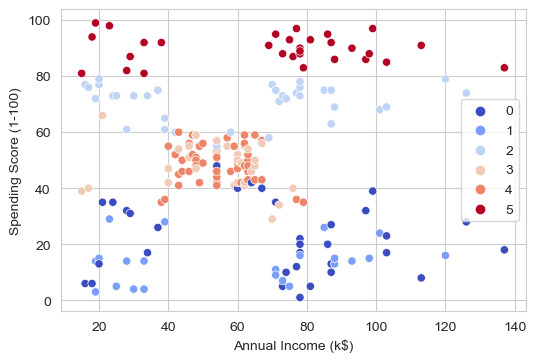

In [39]:
sns.scatterplot(data=df, x= "Annual Income (k$)", y="Spending Score (1-100)", hue =y_kmeans, palette="coolwarm" )

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

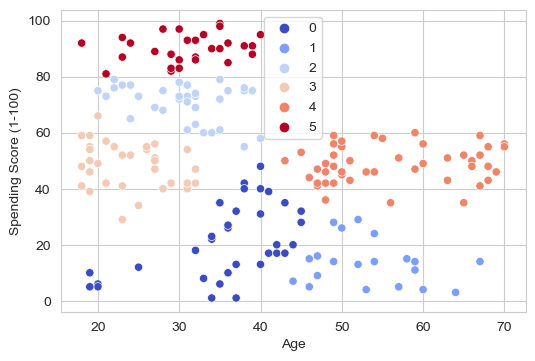

In [41]:
sns.scatterplot(data=df, x= "Age", y="Spending Score (1-100)", hue =y_kmeans, palette="coolwarm" )

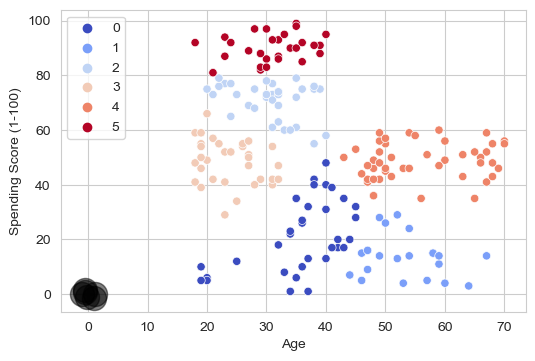

In [37]:
sns.scatterplot(data=df, x= "Age", y="Spending Score (1-100)", hue =y_kmeans, palette="coolwarm" )
centers=km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="black", s=300, alpha = 0.5)

In [ ]:
# Merkezler yerlesmedi??

In [50]:
km.inertia_

63.75541069072696

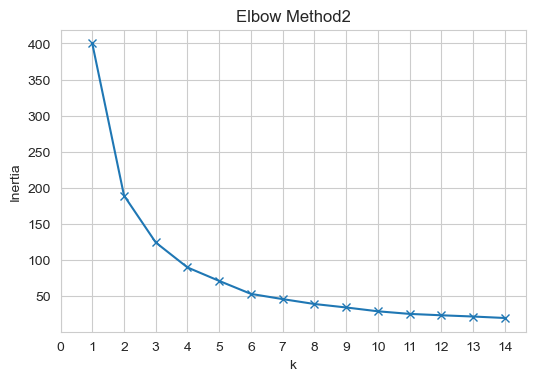

In [53]:
inertia = []
K = range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(X2)
    inertia.append(km.inertia_)
plt.plot(K, inertia, marker= "x")
plt.xlabel("k")
plt.xticks(np.arange(15))
plt.ylabel("Inertia")
plt.title("Elbow Method2")
plt.show()

In [ ]:
# k=4 de olabilirmis gibi..

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [54]:
df3.head(1)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39


In [46]:
yeni= ["Annual Income (k$)", "Spending Score (1-100)"]
X3= df3[yeni]

In [56]:
z=StandardScaler()
X3[yeni]=z.fit_transform(X3[yeni])

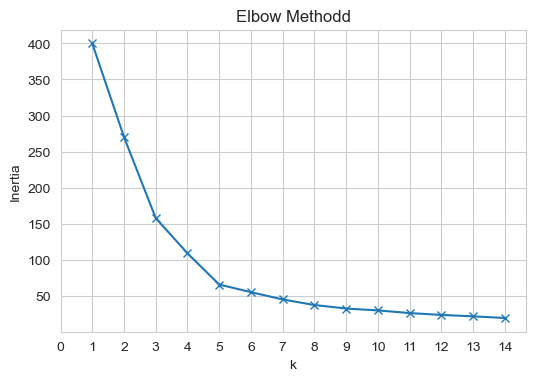

In [57]:
inertia = []
K = range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(X3)
    inertia.append(km.inertia_)
plt.plot(K, inertia, marker= "x")
plt.xlabel("k")
plt.xticks(np.arange(15))
plt.ylabel("Inertia")
plt.title("Elbow Methodd")
plt.show()

In [ ]:
#k=5 iyi gibi duruyor..

In [58]:
km= KMeans(n_clusters=5, n_init=5, init="random", random_state=60)
km.fit(X3)

KMeans(init='random', n_clusters=5, n_init=5, random_state=60)

In [59]:
y2_kmeans= km.predict(X2)
y2_kmeans

array([4, 0, 4, 0, 1, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 1, 0,
       3, 0, 3, 0, 3, 1, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 2, 0, 2, 2, 2, 0,
       1, 3, 0, 1, 2, 1, 3, 2, 3, 1, 1, 1, 1, 1, 2, 1, 3, 1, 0, 1, 2, 0,
       1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 2, 1, 1, 4, 3, 3, 3, 3,
       2, 0, 1, 4, 4, 4, 3, 2, 3, 2, 1, 1, 1, 2, 4, 0, 1, 2, 3, 1, 3, 1,
       4, 0, 4, 0, 3, 0, 4, 1, 3, 0, 1, 0, 4, 0, 3, 0, 4, 0, 3, 2, 3, 1,
       3, 0, 3, 0, 4, 0, 3, 0, 4, 0, 3, 1, 3, 0, 1, 1, 3, 0, 4, 0, 3, 0,
       3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 4, 1, 4, 2, 3, 0, 3, 0,
       4, 0])

#### *ii. Determine optimal number of clusters*

In [ ]:
#We've done it above

#### *iii. Apply K Means*

In [ ]:
#We've done mostly above

In [76]:
X3["Cluster_kmeans"]=km.fit_predict(X3) 

#### *iv. Visualizing and Labeling All the Clusters*

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

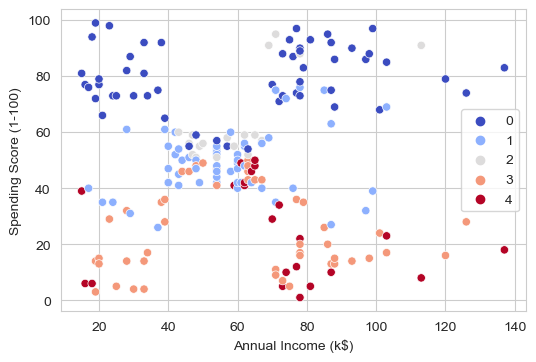

In [60]:
sns.scatterplot(data=df, x= "Annual Income (k$)", y="Spending Score (1-100)", hue =y2_kmeans, palette="coolwarm" )

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred', 
              'weight': 'bold', 'size': 14}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [41]:
hc_ward = linkage(y = X2, method = "ward")  
hc_complete = linkage(X2, "complete")      
hc_average = linkage(X2, "average")         
hc_single = linkage(X2, "single") 

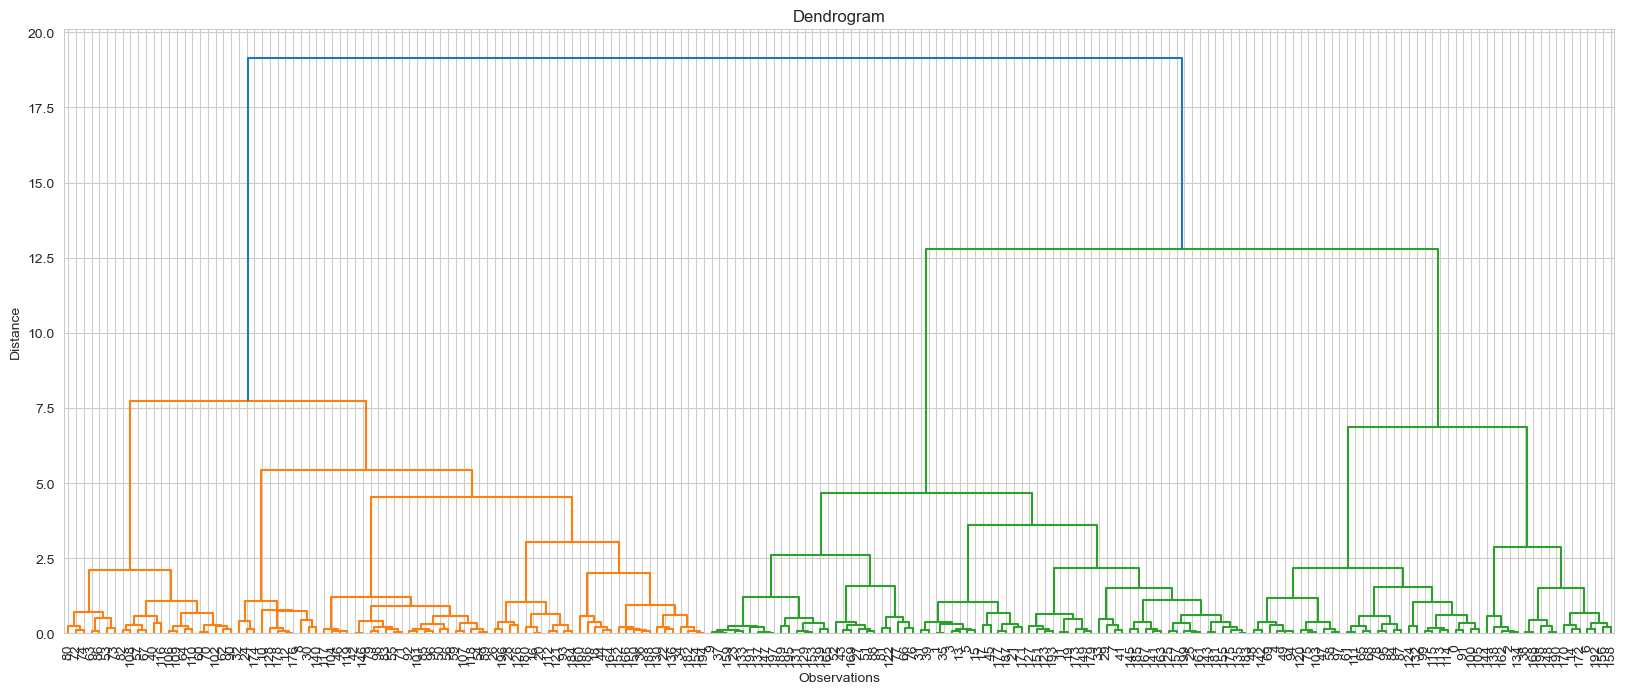

In [42]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10); 

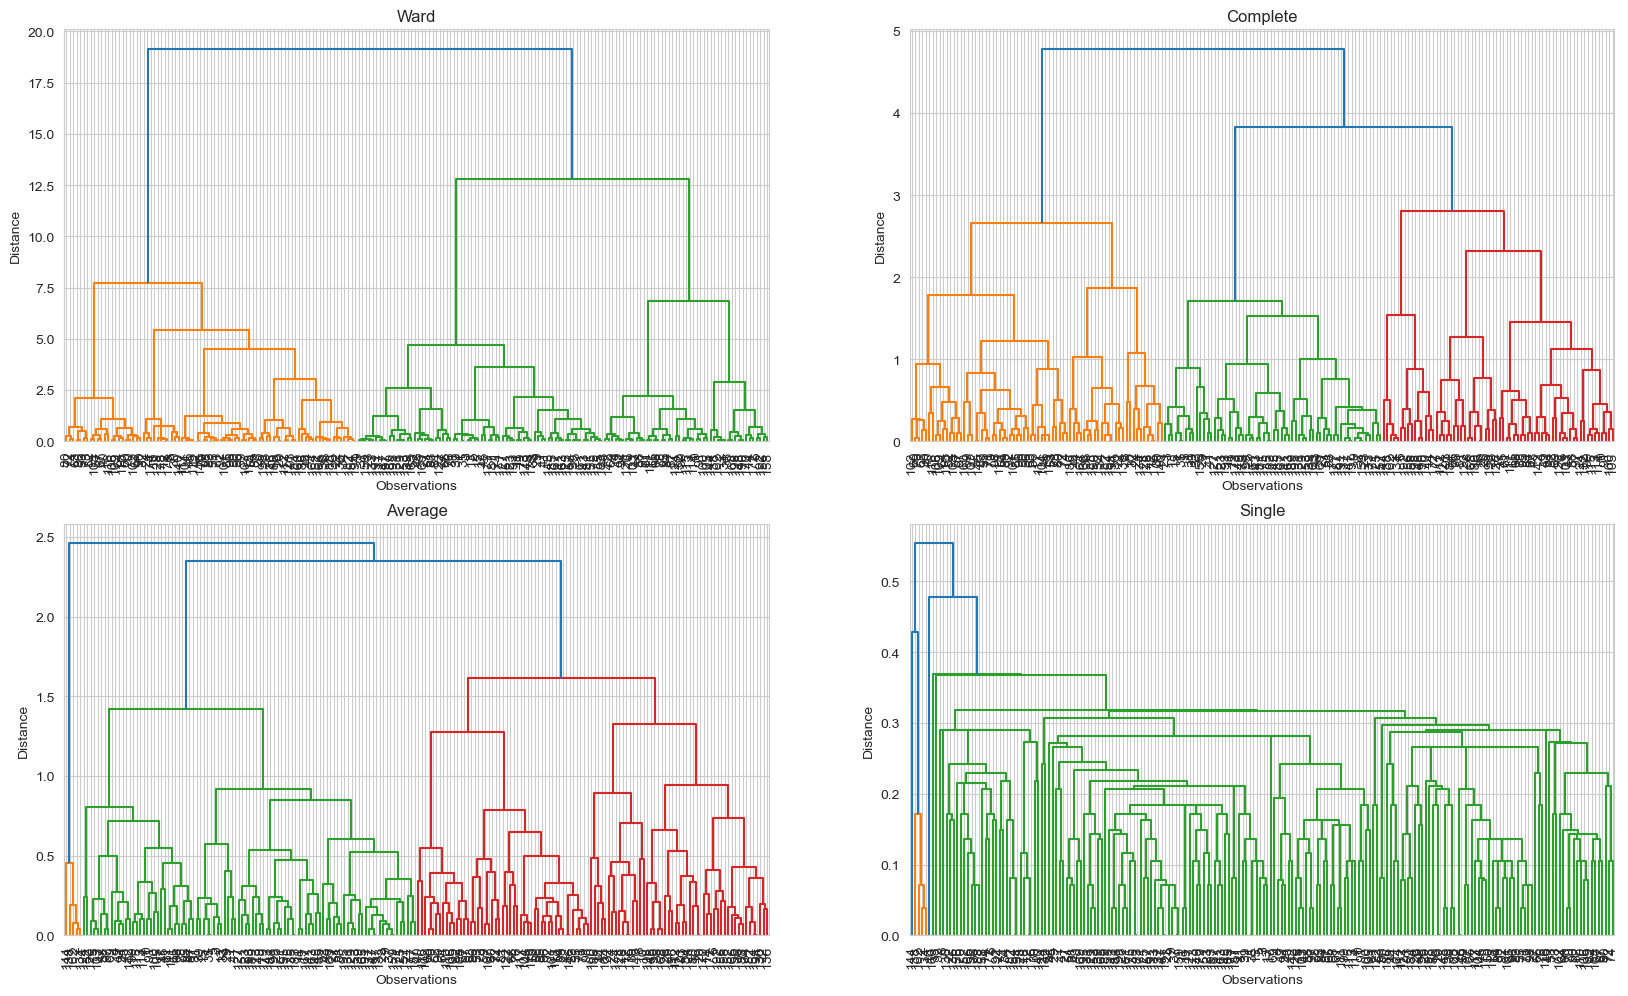

In [43]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

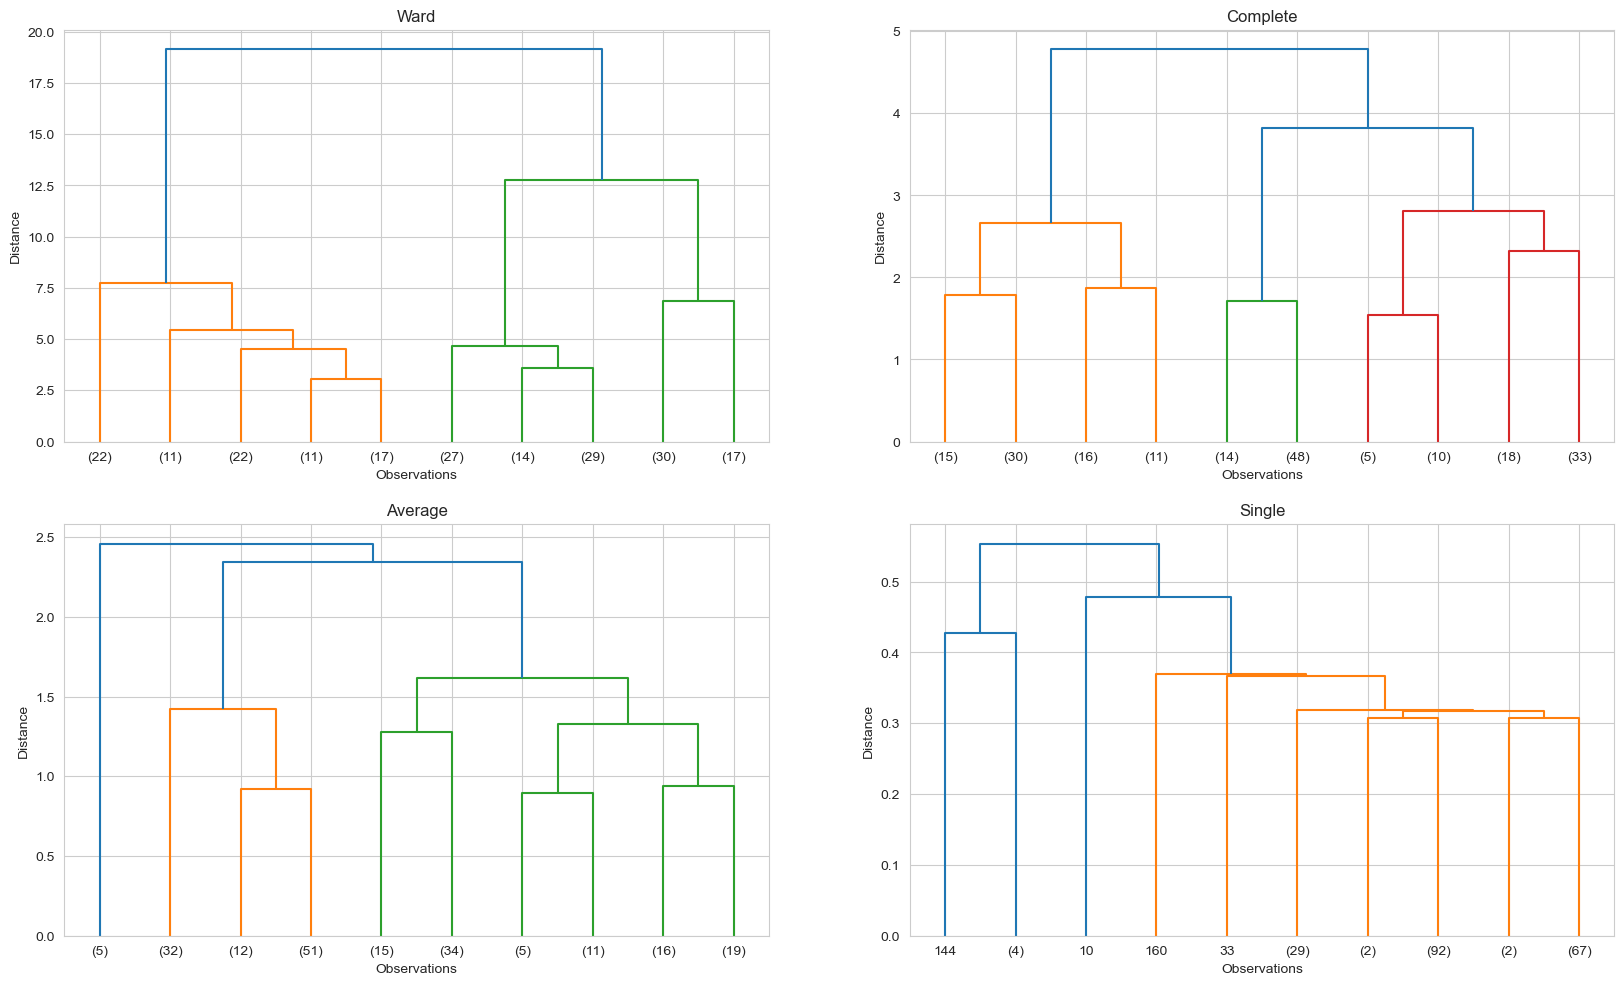

In [44]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)   # leaf_font_size --> X eksenindeki yazilari buyutmek icin.

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

## Clustering based on Annual Income and Spending Score- x2

In [47]:
hc_ward = linkage(y = X3, method = "ward")  
hc_complete = linkage(X3, "complete")      
hc_average = linkage(X3, "average")         
hc_single = linkage(X3, "single") 

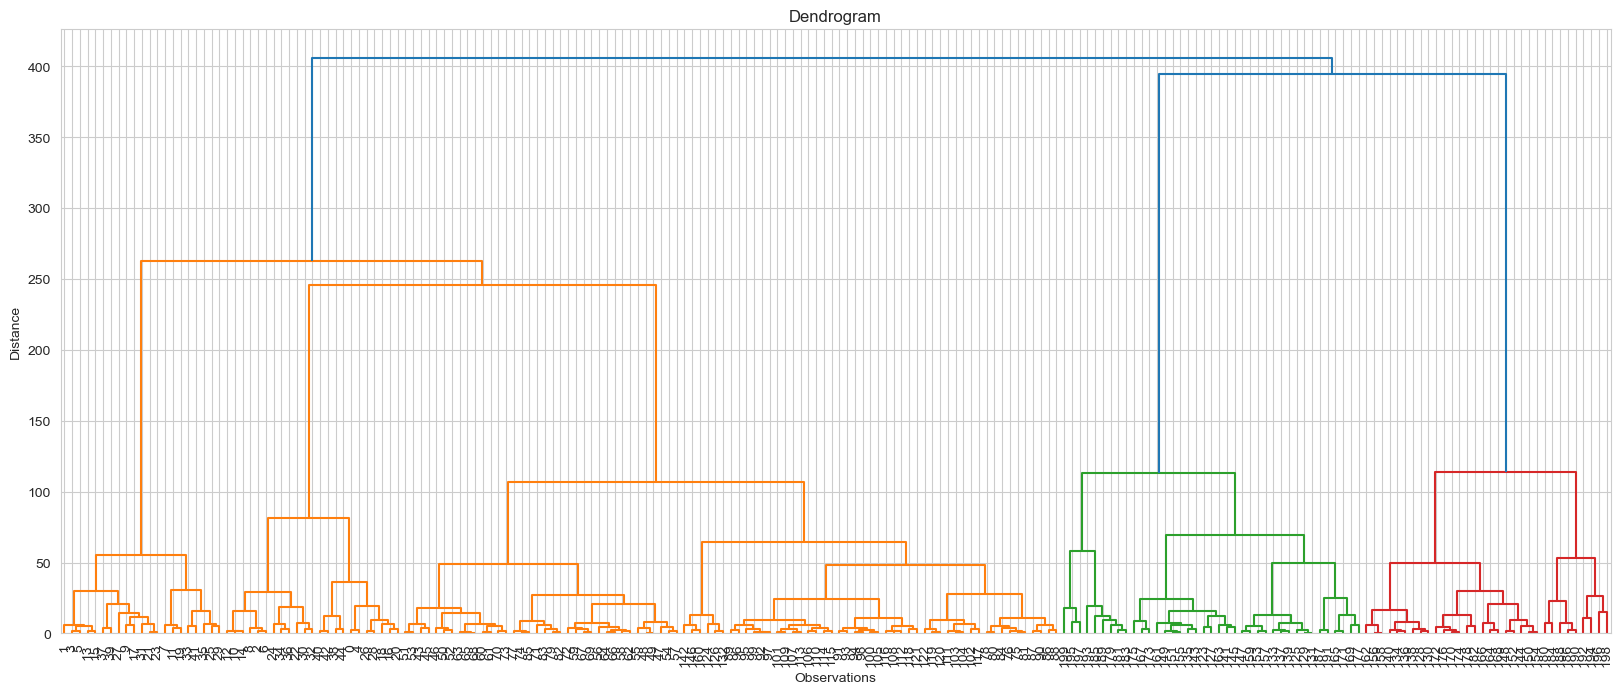

In [48]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

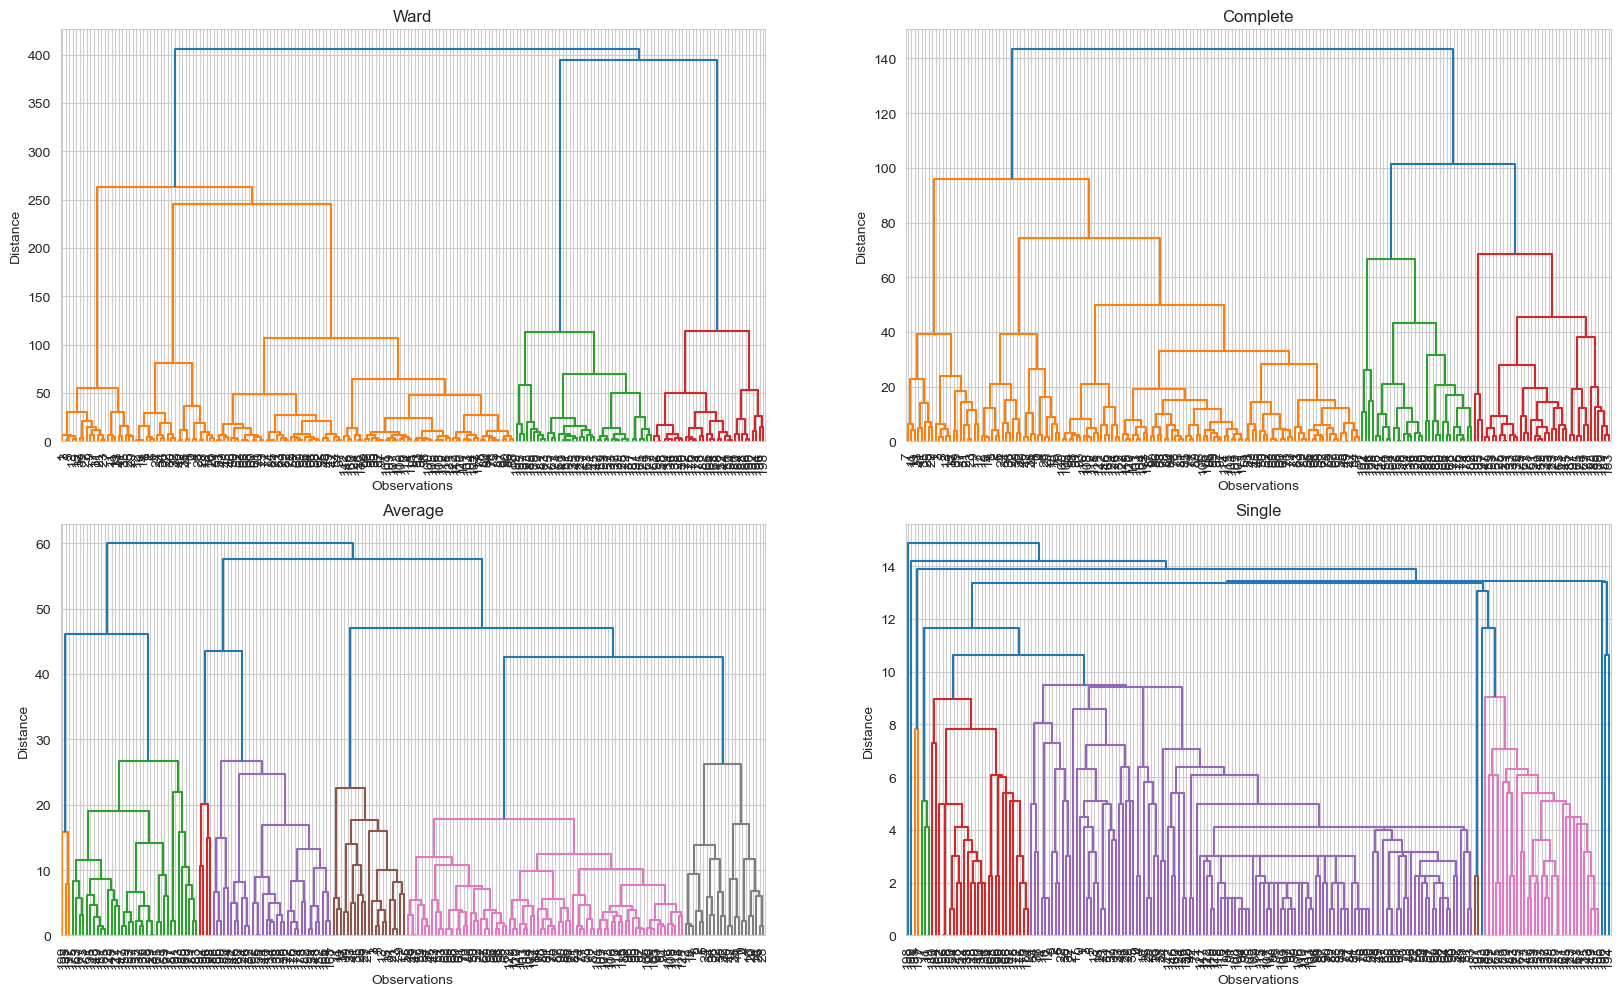

In [49]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

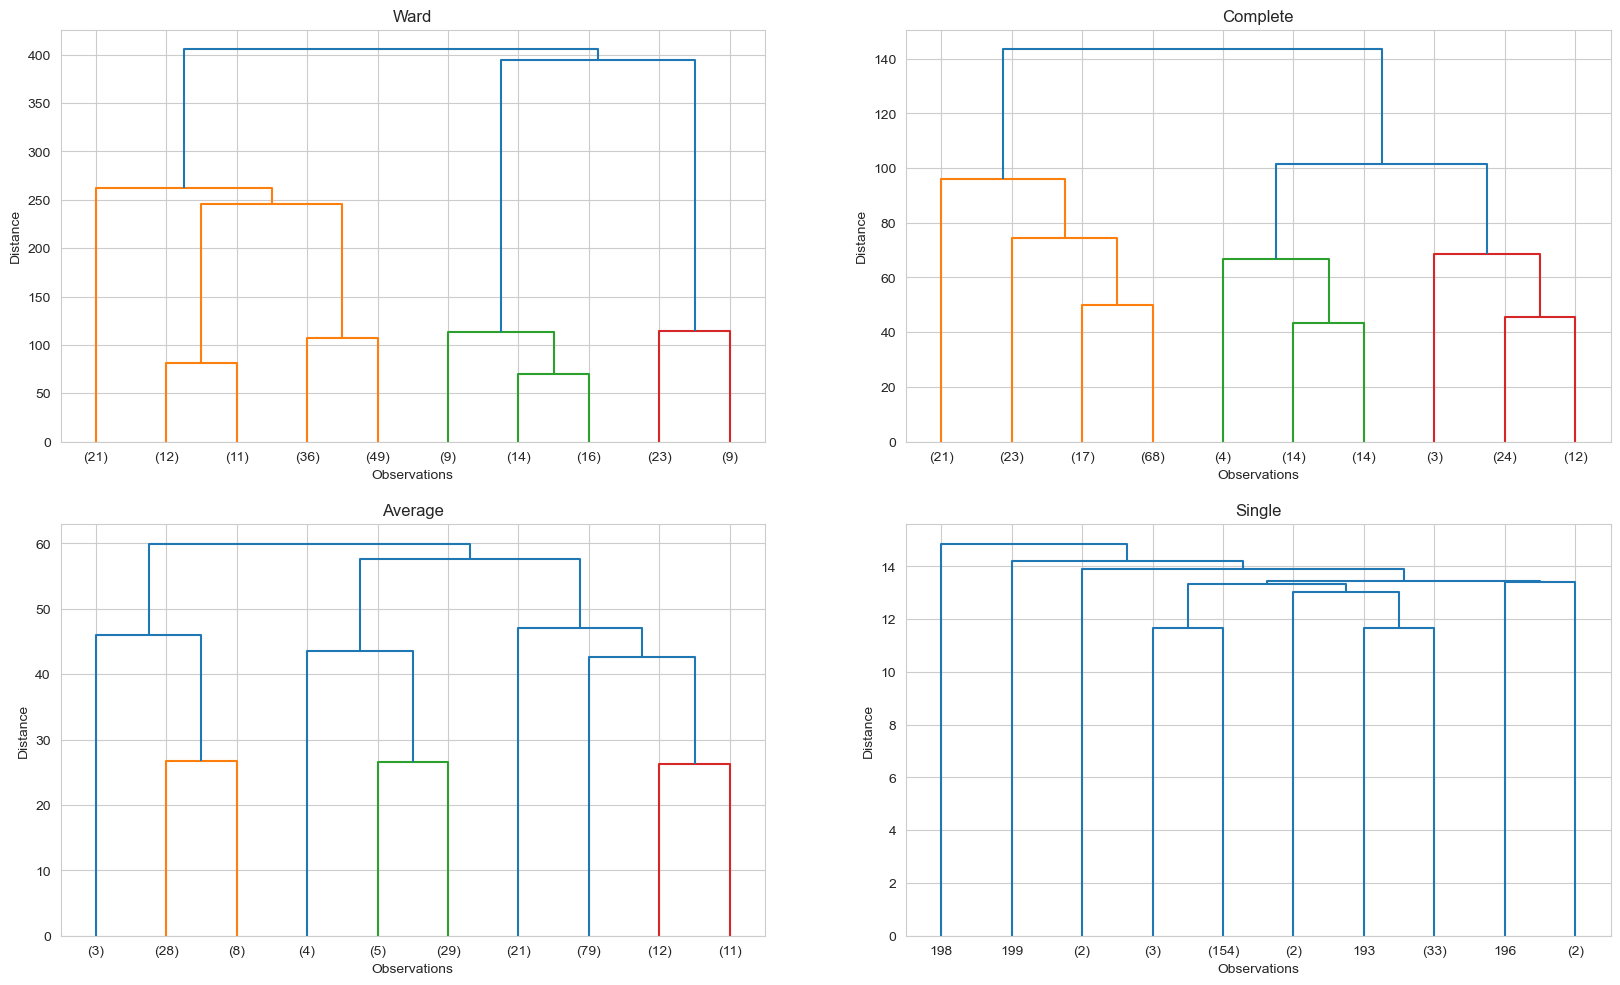

In [50]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)   # leaf_font_size --> X eksenindeki yazilari buyutmek icin.

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [51]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
clusterX_agg = model.fit_predict(X2)
X2["clusterX_agg"] = clusterX_agg

In [54]:
X2.head()

,Age,Spending Score (1-100),clusterX_agg
0,-1.425,-0.435,0
1,-1.281,1.196,2
2,-1.353,-1.716,0
3,-1.138,1.040,2
4,-0.563,-0.396,0


#### Annual Income and Spending Score- x2

In [55]:
model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
clusterX1_agg = model.fit_predict(X3)
X3["clusterX1_agg"] = clusterX1_agg

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

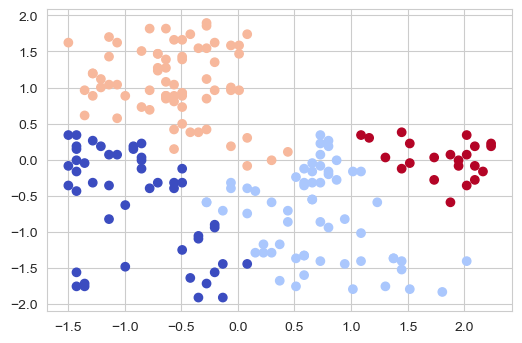

In [56]:
plt.scatter(X2["Age"], X2["Spending Score (1-100)"], c = clusterX_agg ,cmap = "coolwarm");

#### Annual Income and Spending Score- x2

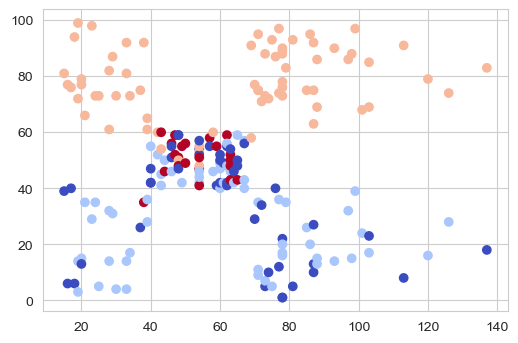

In [58]:
plt.scatter(X3["Annual Income (k$)"], X3["Spending Score (1-100)"], c = clusterX_agg ,cmap = "coolwarm");

#### Interpretation based on Age and Spending Score- x1

In [67]:
df["Age_Spending_Score_cluster"] = X2.Cluster_kmeans

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

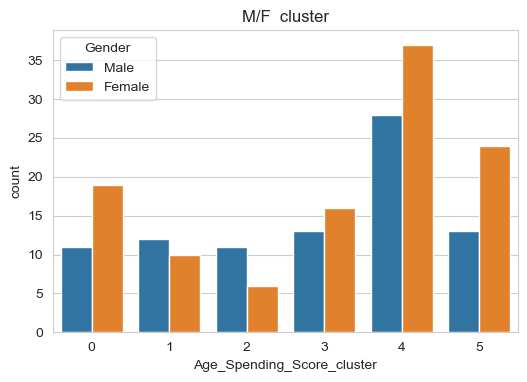

In [68]:
plt.title("M/F  cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df["Age_Spending_Score_cluster"], hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [71]:
df.groupby("Age_Spending_Score_cluster").mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Age_Spending_Score_cluster,,,,
0,85.933,23.767,54.500,47.600
1,80.273,63.909,53.045,50.636
2,129.824,31.000,73.176,12.118
3,112.172,51.207,65.310,15.690
4,108.677,30.154,63.431,79.754
5,87.351,45.378,55.378,44.676


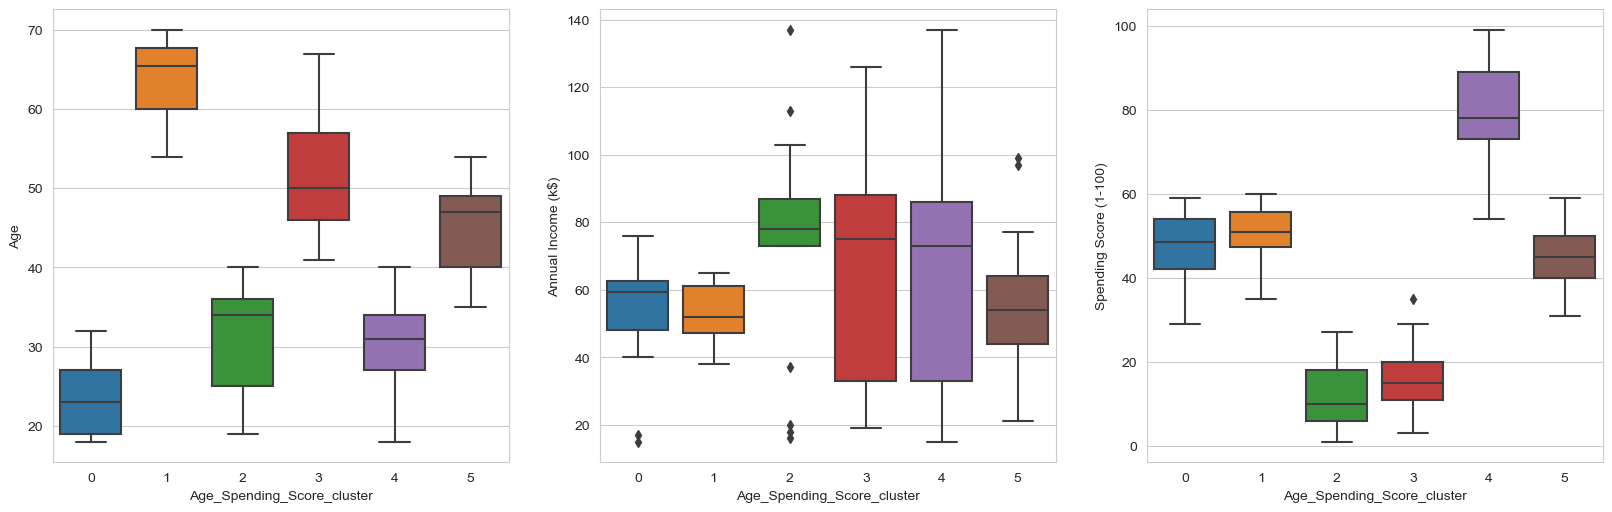

In [72]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "Age_Spending_Score_cluster", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual Income (k$)", x = "Age_Spending_Score_cluster",  data = df)

plt.subplot(133)
sns.boxplot(y = "Spending Score (1-100)", x = "Age_Spending_Score_cluster", data = df);

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

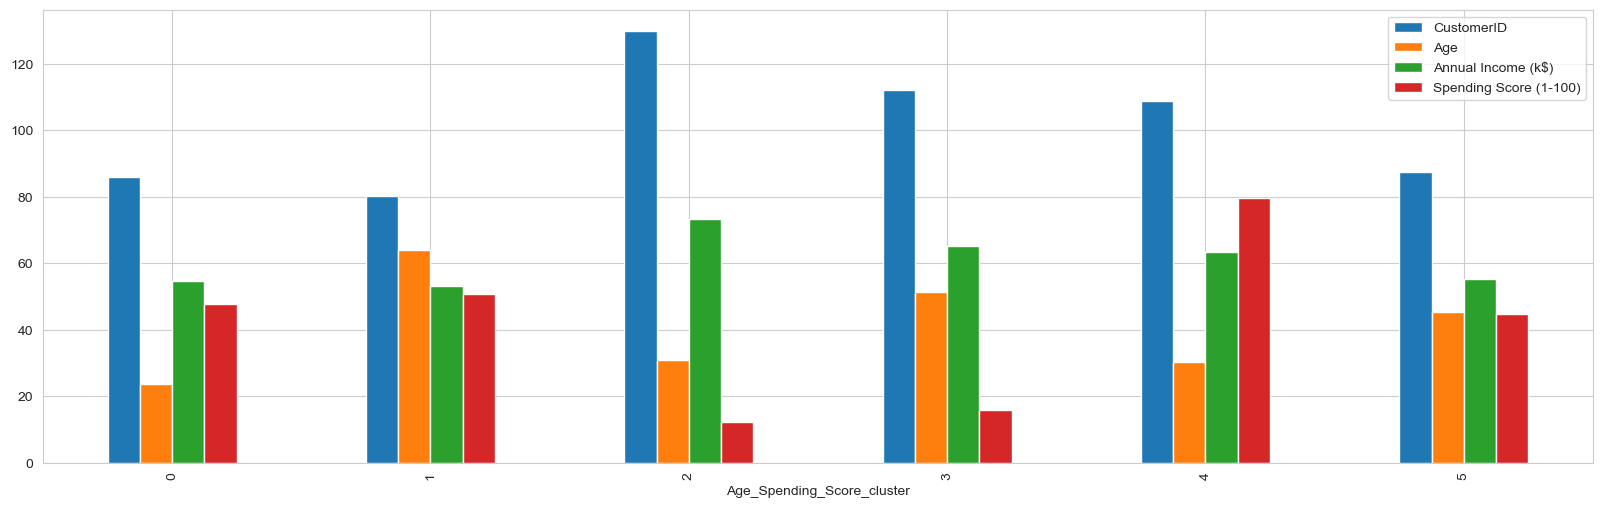

In [73]:
ax = df.groupby("Age_Spending_Score_cluster").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f") 

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

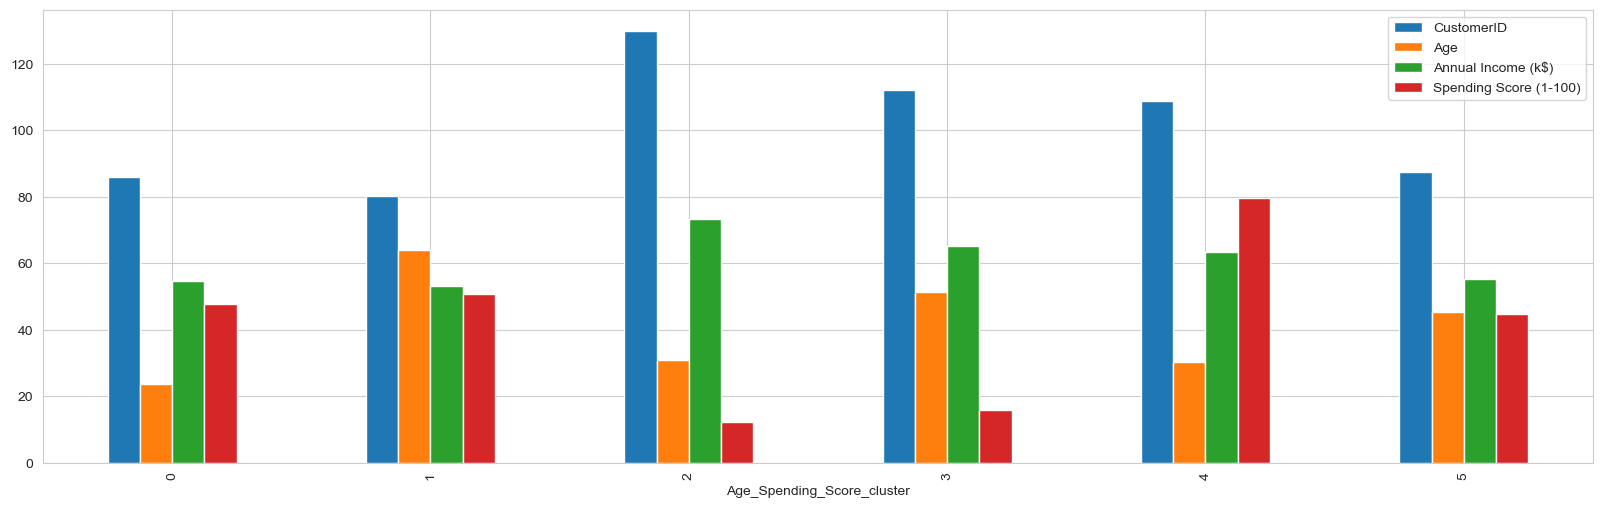

In [74]:
ax = df.groupby("Age_Spending_Score_cluster").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [77]:
df["Annual_Income_Spending_Score_cluster"] = X3.Cluster_kmeans
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_Spending_Score_cluster,Annual_Income_Spending_Score_cluster
0,1,Male,19,15,39,0,5
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,2,5
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,0,5


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

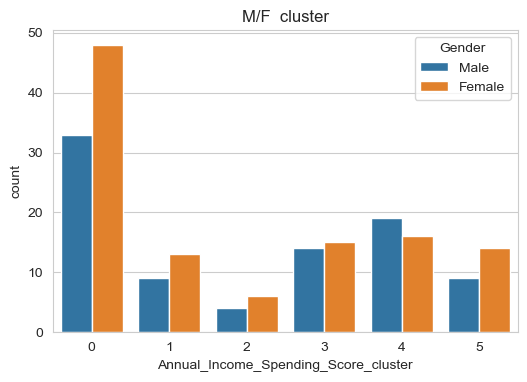

In [78]:
plt.title("M/F  cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df["Annual_Income_Spending_Score_cluster"], hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

In [79]:
df.groupby(["Gender", "Annual_Income_Spending_Score_cluster"]).mean()

CustomerID    Age  Annual Income (k$)  Spending Score (1-100)  Age_Spending_Score_cluster
Gender Annual_Income_Spending_Score_cluster                                                                                           
Female 0                                         86.771 40.896              55.354                  49.000                       2.417
       1                                         22.769 25.462              25.692                  80.538                       4.000
       2                                        189.667 33.667             105.667                  83.000                       4.000
       3                                        152.800 31.600              78.200                  81.133                       4.000
       4                                        168.125 43.250              90.938                  22.062                       2.875
       5                                         24.714 43.214              27.357                  21.714                       2.857
Male   0                                         85.667 45.364              55.212                  50.273                       2.000
       1                                         23.556 25.000              25.778                  77.667                       4.000
       2                                        193.000 30.000             115.750                  80.500                       4.000
       3                                        151.143 34.214              78.929                  83.286                       4.000
       4                                        161.211 39.316              85.895                  12.947                       2.579
       5                                         20.333 48.333              24.667                  19.667                       3.000

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___